In [25]:
"""
Support Vector Machines, or VSM, are one of the very strong and interesting appraoches that we can utilize in
supervised machine learning. They are use for both classification and regression. SVMs are a discriminative classifer, which
means they draw a boundary between clusters of data and hence slits them.


"""

'\nSupport Vector Machines, or VSM, are one of the very strong and interesting appraoches that we can utilize in\nsupervised machine learning. They are use for both classification and regression. SVMs are a discriminative classifer, which\nmeans they draw a boundary between clusters of data and hence slits them.\n\n'

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns; sns.set()

'\ns[4:]\n# Returns from pos 4 to the end of the string\ns[:4]\n# Returns from the beginning to pos 3\ns[:]\n# returns all\ns[4:8:2] \n# Return a character, then move forward 2 positions, etc, use - for where 2 is located to go backwards\n\na[start:end] # items start through end-1\na[start:]    # items start through the rest of the array\na[:end]      # items from the beginning through end-1\na[:]         # a copy of the whole array\na[-1]    # last item in the array\na[-2:]   # last two items in the array\na[:-2]   # everything except the last two items\n\n'

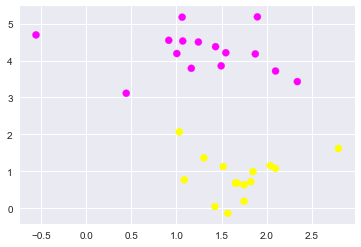

In [27]:
#Quick example of SVM classification - importing sample data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 30, centers = 2, random_state = 0, cluster_std = 0.60)

plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'spring')

#Splicing recap:
'''
s[4:]
# Returns from pos 4 to the end of the string
s[:4]
# Returns from the beginning to pos 3
s[:]
# returns all
s[4:8:2] 
# Return a character, then move forward 2 positions, etc, use - for where 2 is located to go backwards

a[start:end] # items start through end-1
a[start:]    # items start through the rest of the array
a[:end]      # items from the beginning through end-1
a[:]         # a copy of the whole array
a[-1]    # last item in the array
a[-2:]   # last two items in the array
a[:-2]   # everything except the last two items

'''


(-1, 3.5)

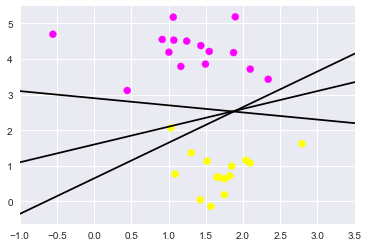

In [28]:
# Discriminative classifer draws a line between the obvious two clusters of data. However, with a single straight line it is
# certainly possible there are more than one line possible to draw. Thus several possibilities to seperate the two sets are
# drawn.

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)] :
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1,3.5)

(-1, 3.5)

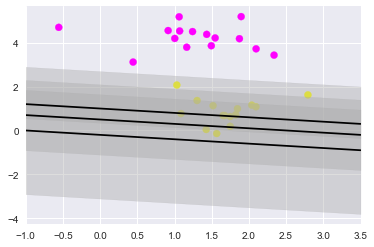

In [29]:
#SVMs maximize the margin between the line and the points(clusters).

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'spring')

for b, d in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)] :
    yfit = m * xfit + b
    plt.plot(xfit, m * xfit + b, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = "#AAAAAA", alpha = 0.4)
    
plt.xlim(-1,3.5)


In [30]:
#Importing and fitting a SVM

from sklearn.svm import SVC # For SV classifier
clf = SVC(kernel = 'linear')
clf.fit(X, y)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.73458825 -0.42216712].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

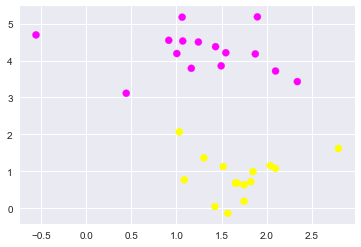

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);